In [62]:
import seaborn as sns

In [63]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 결측치 여부 확인
# 있으면 어떻게 처리할건지
# 수치형과 / 범주형을 구분해서..

In [64]:
titanic = titanic.drop(columns = ['who'])

In [65]:
df =  titanic.loc[:, : 'age']
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head()

,survived,pclass,sex,age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


1. 결측치 데이터(age)를 제거

In [68]:
df2 = df.dropna(subset=['age'])
X = df2.iloc[:,1:].to_numpy()
Y = df2['survived']

2. 데이터 분할(학습용, 테스트용)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

3. 모델 선정

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
kn =  KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
kn.score(x_train,y_train), kn.score(x_test, y_test)

(0.8353765323992994, 0.7062937062937062)

개선
  - 결측치 데이터를 살려보자

In [73]:
fillna_age =  df['age'].fillna(df['age'].mean())
df3 = df.copy(deep = True)
df3['age'] = fillna_age

In [74]:
df3

,survived,pclass,sex,age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


In [75]:
def test_model(data):
  X = data.iloc[:, 1:]
  Y = data.iloc[:, 0].to_numpy()
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
  kn = KNeighborsClassifier()
  kn.fit(x_train,y_train)
  print(kn.score(x_train,y_train),  kn.score(x_test, y_test) )

test_model(df3)

0.8258426966292135 0.7653631284916201


In [76]:
df[df.isnull().any(axis=1)].head()

,survived,pclass,sex,age
5,0,3,1,NaN
17,1,2,1,NaN
19,1,3,0,NaN
26,0,3,1,NaN
28,1,3,0,NaN


결측치를 클래스별 성별의 평균으로

In [77]:
grouped = df.groupby(['pclass','sex'])

In [78]:
for key, group in grouped:
  print(f'key:{key}')
  print(f'group:{group}')
  print('--------'*20)

key:(1, 0)
group:     survived  pclass  sex   age
1           1       1    0  38.0
3           1       1    0  35.0
11          1       1    0  58.0
31          1       1    0   NaN
52          1       1    0  49.0
..        ...     ...  ...   ...
856         1       1    0  45.0
862         1       1    0  48.0
871         1       1    0  47.0
879         1       1    0  56.0
887         1       1    0  19.0

[94 rows x 4 columns]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
key:(1, 1)
group:     survived  pclass  sex   age
6           0       1    1  54.0
23          1       1    1  28.0
27          0       1    1  19.0
30          0       1    1  40.0
34          0       1    1  28.0
..        ...     ...  ...   ...
839         1       1    1   NaN
857         1       1    1  51.0
867         0       1    1  31.0
872         0       1    1  33.0
889         1       1  

In [18]:
grouped['age'].mean()

pclass  sex
1       0      34.611765
        1      41.281386
2       0      28.722973
        1      30.740707
3       0      21.750000
        1      26.507589
Name: age, dtype: float64

In [19]:
grouped['age'].transform('mean')

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: age, Length: 891, dtype: float64

In [81]:
fillna_age2 =  df['age'].fillna(grouped['age'].transform('mean'))
df4 = df.copy(deep=True)
df4['age'] = fillna_age2
test_model(df4)

0.8258426966292135 0.7653631284916201


Feature 분석.. EDA

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

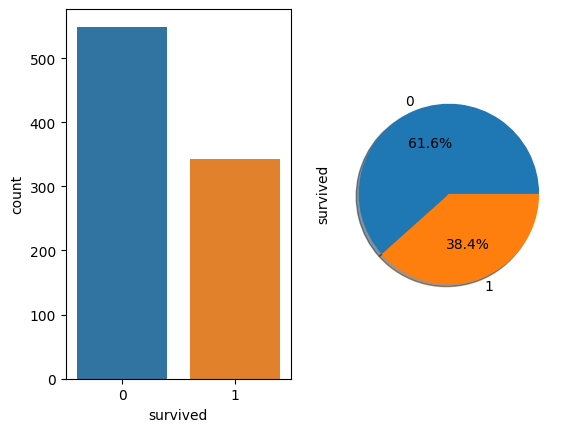

In [83]:
plt.subplot(1,2,1)
sns.countplot(data = titanic, x='survived')

plt.subplot(1,2,2)
titanic['survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

plt.show()


oversampling

In [84]:
from imblearn.over_sampling import SMOTE

In [86]:
# SMOTE를 통한 oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

In [87]:
import numpy as np
np.unique(y_train,return_counts=True), np.unique(y_train_resampled,return_counts=True)

((array([0, 1]), array([337, 234])), (array([0, 1]), array([337, 337])))

In [88]:
kn = KNeighborsClassifier()
kn.fit(x_train_resampled, y_train_resampled)
kn.score(x_train,y_train),kn.score(x_test,y_test)

(0.8493870402802102, 0.6993006993006993)

SMOTE
  - 적은샘플링을 선택
  - 인접한 샘플 선택
    - 유클리드거리 등을 사용해서 가까운 이웃을 판별
  - 샘플간 보간(interpolatioin) : 이웃데이터와 새로만든 데이터의 오차를 보정
  - 샘플 생성

쓸만한 컬럼(피처)가 있는지?
  - 전부 사용

In [89]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [90]:
titanic = titanic.drop(columns=['fare','class','alive','who','embark_town'])

In [91]:
# 전처리
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode()[0])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   embarked    891 non-null    object  
 7   adult_male  891 non-null    bool    
 8   deck        891 non-null    category
 9   alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(2)
memory usage: 51.8+ KB


In [92]:
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])
titanic['embarked'] = le.fit_transform(titanic['embarked'])
titanic['adult_male'] = le.fit_transform(titanic['adult_male'])
titanic['alone'] = le.fit_transform(titanic['alone'])
titanic['deck'] = le.fit_transform(titanic['deck'])

In [93]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
embarked      0
adult_male    0
deck          0
alone         0
dtype: int64

In [95]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   embarked    891 non-null    int64  
 7   adult_male  891 non-null    int64  
 8   deck        891 non-null    int64  
 9   alone       891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [96]:
np.unique(titanic.survived,return_counts=True)

(array([0, 1]), array([549, 342]))

In [97]:
# 전체데이터를 스케일링 하기
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = RobustScaler()

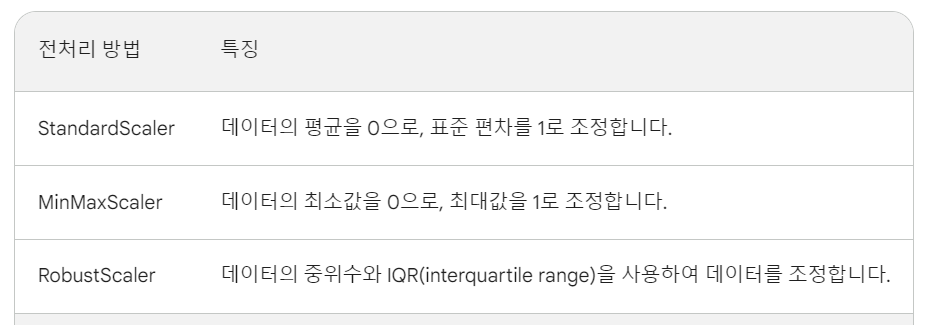

In [98]:
X = titanic.iloc[:,1:]
Y = titanic.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)
# SMOTE를 통한 oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)
scaler.fit(x_train_resampled)
x_train_resampled_scaled = scaler.transform(x_train_resampled)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


# 모델 선택
kn = KNeighborsClassifier()
kn.fit(x_train_resampled_scaled, y_train_resampled)
# 평가
kn.score(x_train_scaled,y_train), kn.score(x_test_scaled,y_test)

(0.8469101123595506, 0.770949720670391)

In [99]:
# one-hot
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(columns=['fare','class','alive','who','embark_town'])
# 전처리
titanic['age'] = titanic['age'].fillna(round(titanic['age'].mean()))
titanic['age'] = round(titanic['age'],0)
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode()[0])
# one-hot
import pandas as pd
onthot_cols = ['sex','embarked','deck','pclass','sibsp','parch']
label_cols = ['adult_male','alone']
normal_cols = ['age']

In [100]:
rs = RobustScaler()
titanic['age'] = rs.fit_transform(titanic['age'].values.reshape(-1,1) )

In [101]:
dummies_data = pd.get_dummies(titanic.loc[:,onthot_cols])

In [102]:
age_df = pd.DataFrame(titanic['age'],columns=['age'])
df = pd.concat([age_df,dummies_data],axis=1)

In [103]:
df.head()

,age,pclass,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,-0.615385,3,1,0,0,1,0,0,1,0,0,1,0,0,0,0
1,0.615385,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0
2,-0.307692,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,0.384615,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,0.384615,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [104]:
X = df.to_numpy()
Y = titanic['survived']
kn = KNeighborsClassifier()
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)
kn.fit(x_train,y_train)
kn.score(x_train,y_train), kn.score(x_test,y_test)

(0.8693820224719101, 0.8100558659217877)